# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import shuffle
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import RobustScaler
# Turn off the warnings.
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Dataset Loading

In [2]:
# Define the file path
file_path = r"C:\Users\User\Downloads\archive\Edge-IIoTset dataset\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Dataset Print

In [3]:
# Display the first few rows of the DataFrame to verify it was imported correctly
df

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157795,2021 23:24:32.698981000,193.152.82.43,192.168.0.128,0,0.0,0.0,0,48729.0,40690.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157796,2021 23:24:32.699354000,253.52.1.213,192.168.0.128,0,0.0,0.0,0,45657.0,40702.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157797,2021 23:24:32.719931000,107.155.221.49,192.168.0.128,0,0.0,0.0,0,57686.0,41423.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP
157798,2021 23:24:32.752054000,77.242.58.228,192.168.0.128,0,0.0,0.0,0,9555.0,42379.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DDoS_ICMP


In [4]:
Columns = (['frame.time', 'ip.src_host', 'ip.dst_host', 'arp.dst.proto_ipv4',
       'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum',
       'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused',
       'http.file_data', 'http.content_length', 'http.request.uri.query',
       'http.request.method', 'http.referer', 'http.request.full_uri',
       'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack',
       'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin',
       'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack',
       'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options',
       'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream',
       'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu',
       'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request',
       'dns.retransmit_request_in', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len',
       'mqtt.msg_decoded_as', 'mqtt.msg', 'mqtt.msgtype', 'mqtt.proto_len',
       'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len', 'mqtt.ver',
       'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id', 'Attack_label',
       'Attack_type'])

In [5]:
df.columns = Columns

In [6]:
df.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
5,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
6,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
7,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
8,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

In [8]:
df.describe()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.content_length,http.response,http.tls_port,tcp.ack,...,mqtt.len,mqtt.msg_decoded_as,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label
count,157800.000000,157800.000000,157800.000000,157800.000000,1.578000e+05,157800.0,157800.000000,157800.000000,157800.0,1.578000e+05,...,157800.000000,157800.0,157800.000000,157800.000000,157800.000000,157800.000000,157800.0,157800.0,157800.0,157800.000000
mean,0.014195,0.059848,3047.291838,3239.979778,4.046816e+04,0.0,14.715520,0.045748,0.0,7.160039e+07,...,0.419341,0.0,0.161331,0.031686,0.189506,0.031686,0.0,0.0,0.0,0.846001
std,0.149783,0.596245,11144.328203,11406.072994,1.764075e+06,0.0,229.659671,0.208938,0.0,3.101231e+08,...,3.606594,0.0,1.293453,0.354598,2.124206,0.354598,0.0,0.0,0.0,0.360949
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,0.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,1.000000e+00,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.0,4.790000e+02,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000
max,2.000000,6.000000,65532.000000,65524.000000,7.728902e+07,0.0,83655.000000,1.000000,0.0,2.147333e+09,...,39.000000,0.0,14.000000,4.000000,24.000000,4.000000,0.0,0.0,0.0,1.000000


# Dataset Values Show

In [9]:
Results = set(df['Attack_type'].values)
print(Results,end=" ")

{'DDoS_TCP', 'SQL_injection', 'Fingerprinting', 'DDoS_UDP', 'DDoS_HTTP', 'Port_Scanning', 'Ransomware', 'Password', 'XSS', 'Normal', 'Backdoor', 'Vulnerability_scanner', 'DDoS_ICMP', 'Uploading', 'MITM'} 

In [10]:
df.head(10)

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
5,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
6,6.0,192.168.0.152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
7,6.0,192.168.0.101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
8,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
9,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


# Dataset Preprocessing

In [11]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",
                "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
                "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
                "tcp.dstport", "udp.port", "mqtt.msg", "icmp.unused", "http.tls_port", 'dns.qry.type', 'dns.retransmit_request_in', "mqtt.msg_decoded_as", "mbtcp.trans_id", "mbtcp.unit_id", "http.request.method", "http.referer", "http.request.version", "dns.qry.name.len", "mqtt.conack.flags", "mqtt.protoname", "mqtt.topic"]


df.drop(drop_columns, axis=1, inplace=True)

In [12]:
df.head()

,arp.opcode,arp.hw.size,icmp.checksum,icmp.seq_le,http.content_length,http.response,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,...,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.proto_len,mqtt.topic_len,mqtt.ver,mbtcp.len,Attack_label,Attack_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,MITM


# Dataset Information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   arp.opcode              157800 non-null  float64
 1   arp.hw.size             157800 non-null  float64
 2   icmp.checksum           157800 non-null  float64
 3   icmp.seq_le             157800 non-null  float64
 4   http.content_length     157800 non-null  float64
 5   http.response           157800 non-null  float64
 6   tcp.ack                 157800 non-null  float64
 7   tcp.ack_raw             157800 non-null  float64
 8   tcp.checksum            157800 non-null  float64
 9   tcp.connection.fin      157800 non-null  float64
 10  tcp.connection.rst      157800 non-null  float64
 11  tcp.connection.syn      157800 non-null  float64
 12  tcp.connection.synack   157800 non-null  float64
 13  tcp.flags               157800 non-null  float64
 14  tcp.flags.ack       

In [14]:
df.isnull().sum()

arp.opcode                0
arp.hw.size               0
icmp.checksum             0
icmp.seq_le               0
http.content_length       0
http.response             0
tcp.ack                   0
tcp.ack_raw               0
tcp.checksum              0
tcp.connection.fin        0
tcp.connection.rst        0
tcp.connection.syn        0
tcp.connection.synack     0
tcp.flags                 0
tcp.flags.ack             0
tcp.len                   0
tcp.seq                   0
udp.stream                0
udp.time_delta            0
dns.qry.name              0
dns.qry.qu                0
dns.retransmission        0
dns.retransmit_request    0
mqtt.conflag.cleansess    0
mqtt.conflags             0
mqtt.hdrflags             0
mqtt.len                  0
mqtt.msgtype              0
mqtt.proto_len            0
mqtt.topic_len            0
mqtt.ver                  0
mbtcp.len                 0
Attack_label              0
Attack_type               0
dtype: int64

# Correlation Matrix

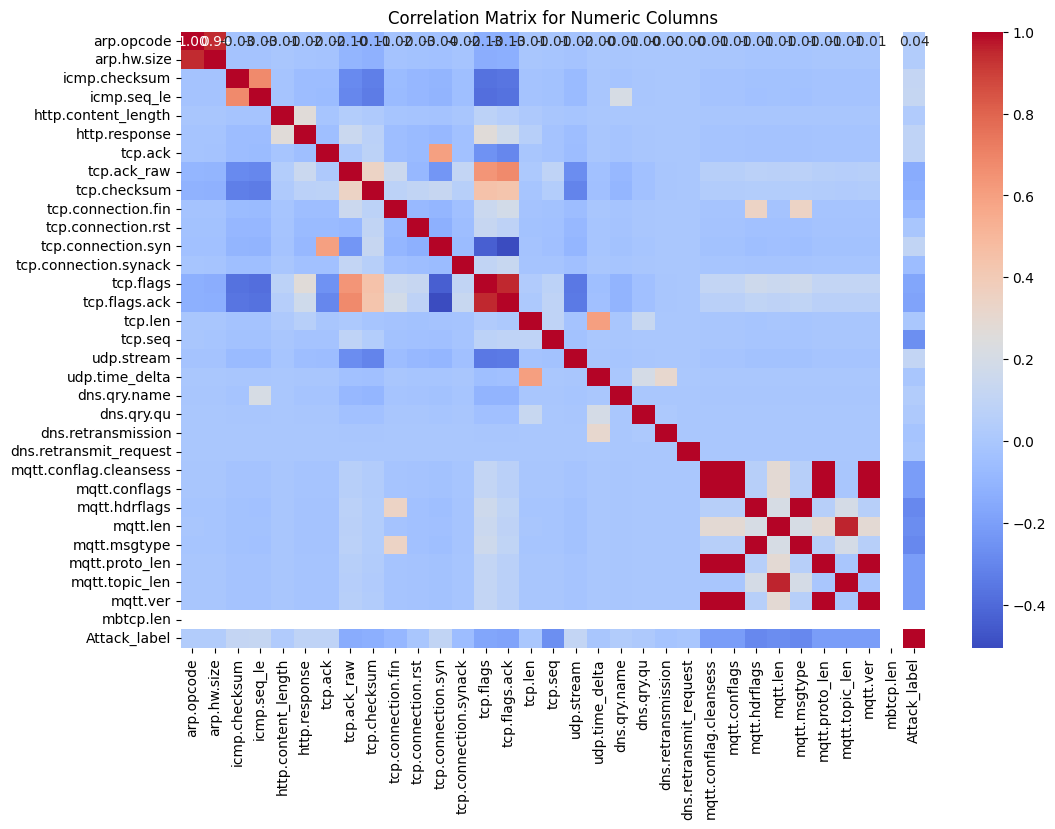

In [15]:
# Visualization 1: Correlation Matrix for Numeric Columns
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

# Visualization - 1

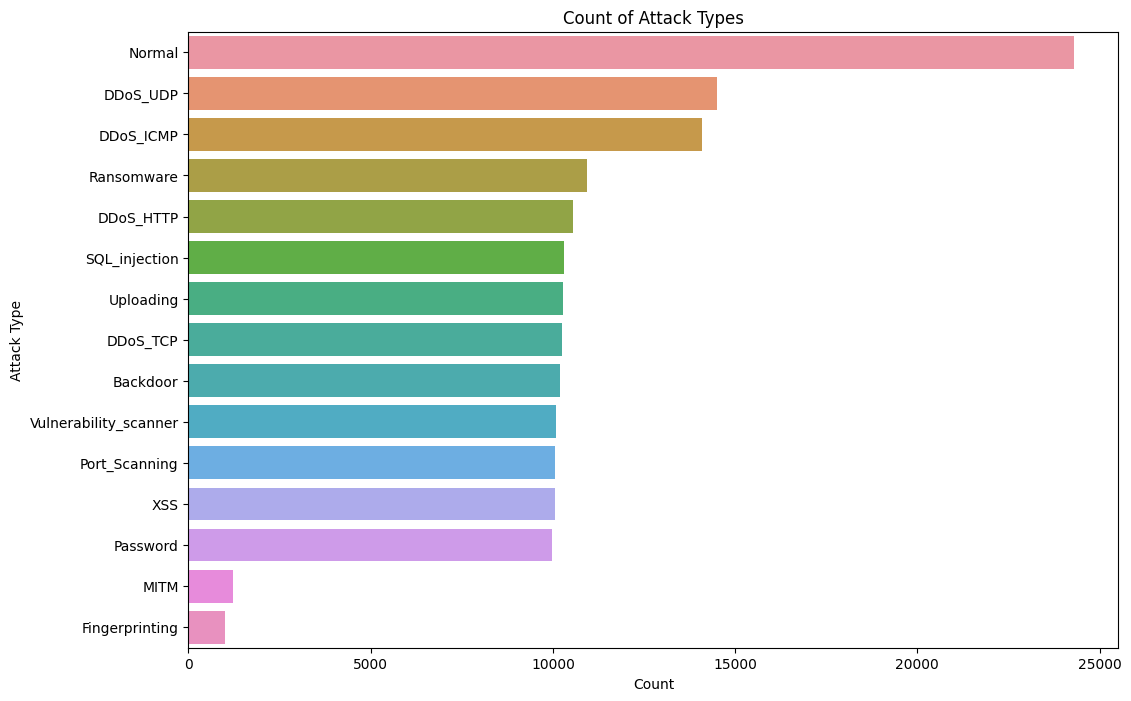

In [16]:
# Visualization 4: Bar Chart for Attack Types
plt.figure(figsize=(12, 8))
sns.countplot(y='Attack_type', data=df, order = df['Attack_type'].value_counts().index)
plt.title('Count of Attack Types')
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.show()

# Visualization - 2

<Figure size 1200x800 with 0 Axes>

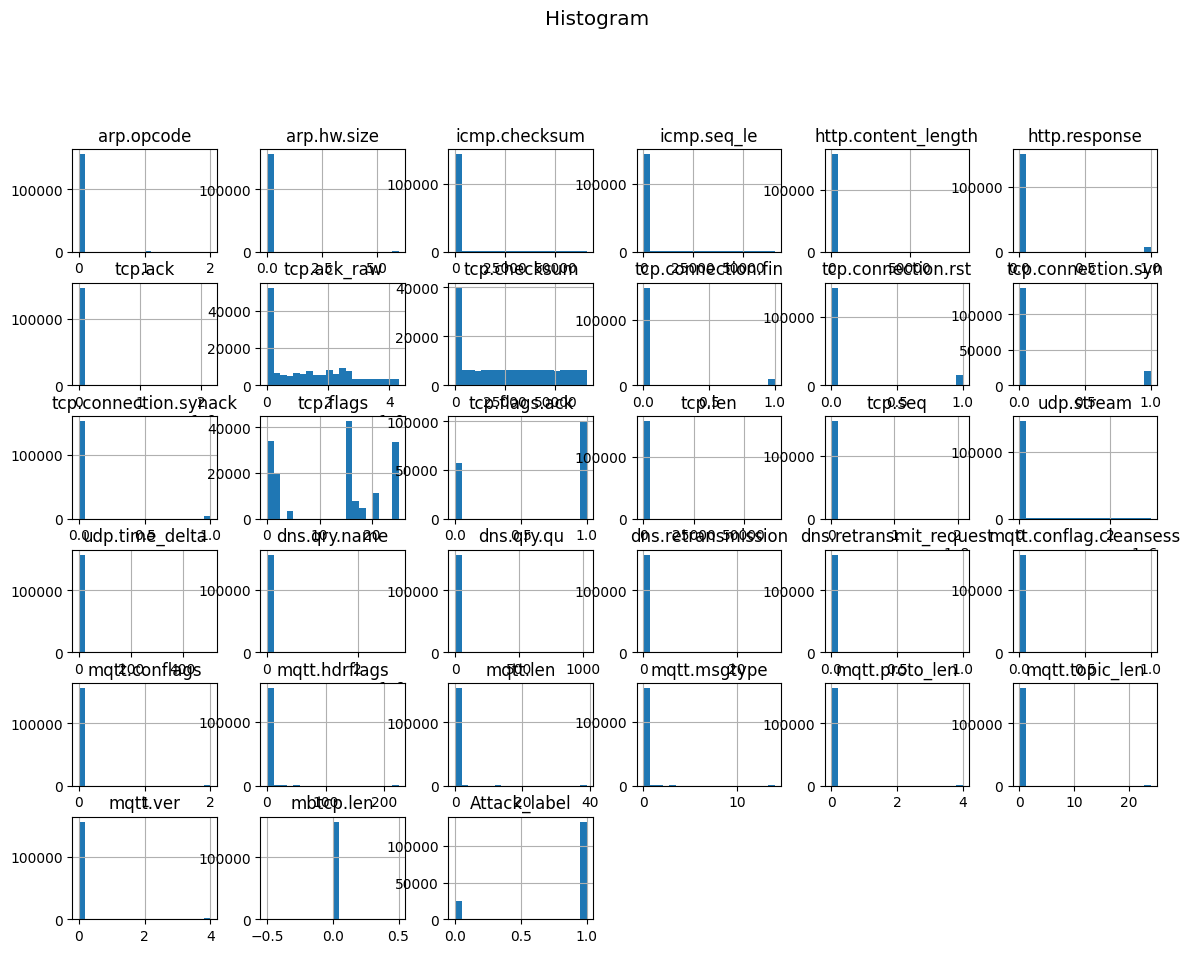

In [17]:
# Visualization 3: Histogram
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histogram', x=0.5, y=1.02, ha='center', fontsize='x-large')
plt.show()

# Visualization - 3

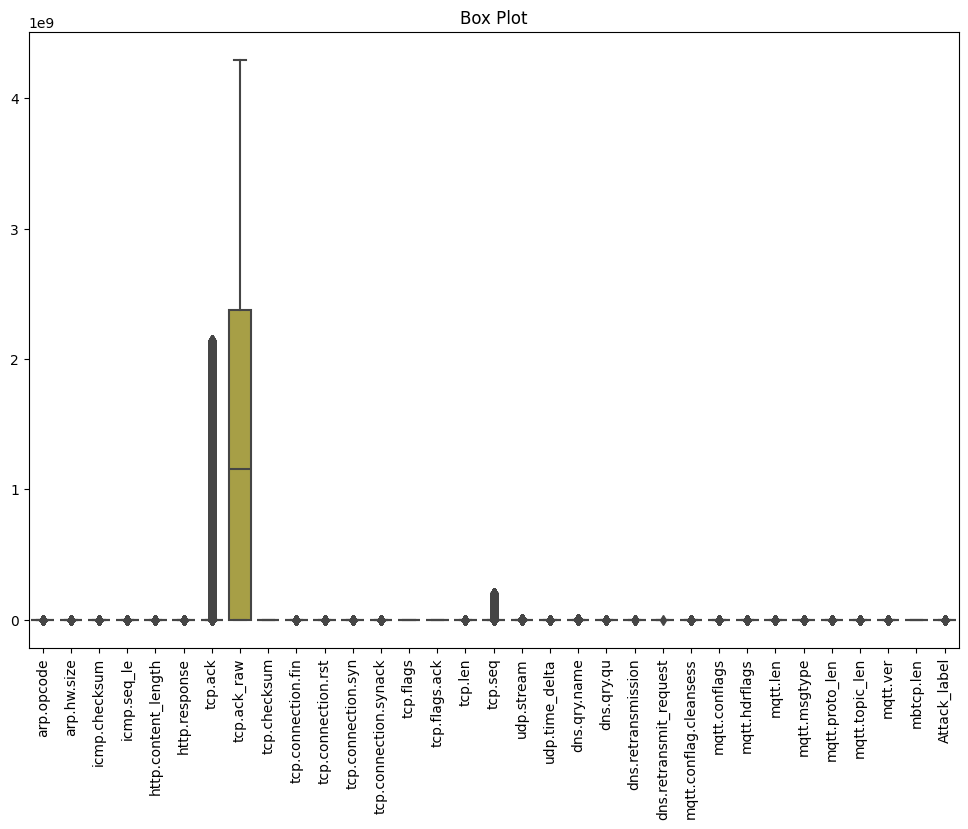

In [18]:
# Visualization 2: Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Box Plot')
plt.xticks(rotation=90)
plt.show()

# Visualization - 4

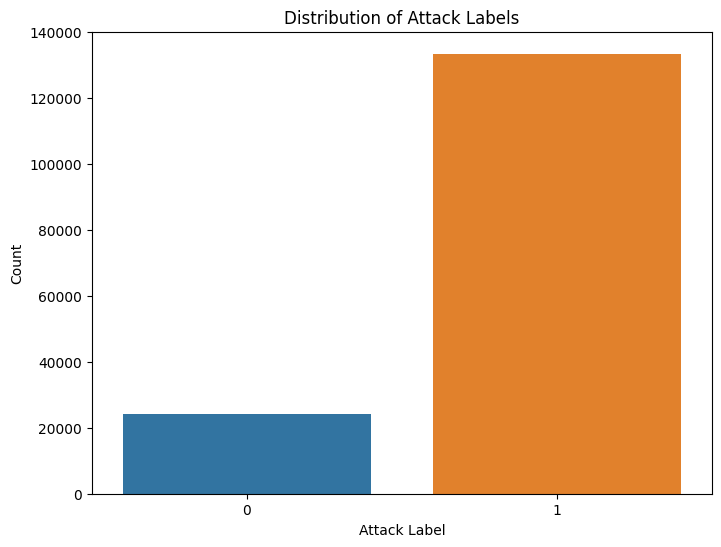

In [19]:
# Check the distribution of Attack_label
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Attack_label')
plt.title('Distribution of Attack Labels')
plt.xlabel('Attack Label')
plt.ylabel('Count')
plt.show()

# Logistic Regression Model Implementation

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [22]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(['Attack_label', 'Attack_type'], axis=1)  # Assuming 'Attack_label' is the target variable
y = df['Attack_label']

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Creating Logistic Regression model
lr_model = LogisticRegression()

# Training the Logistic Regression model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Making predictions
y_pred_lr = lr_model.predict(X_test)

In [26]:
# Calculating accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy_lr)

Accuracy: 0.8592839036755386


In [27]:
# Generating confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

Confusion Matrix:
[[  544  4441]
 [    0 26575]]


# Confusion Matrix Plot - Logistic Regression

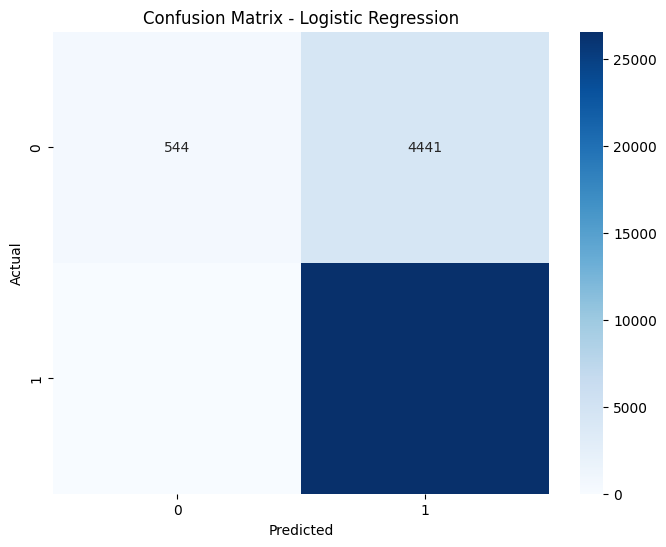

In [28]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy Model Plot

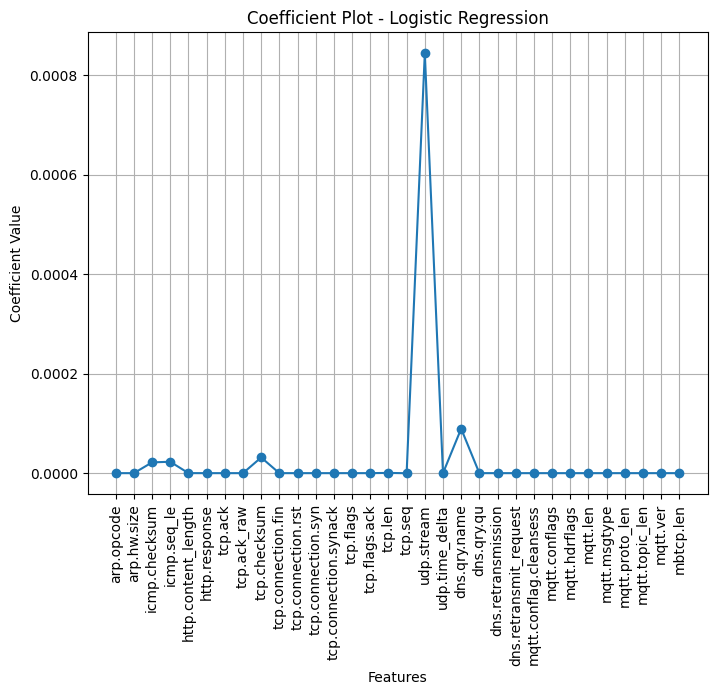

In [30]:
# Plotting accuracy
plt.figure(figsize=(8, 6))
plt.plot(lr_model.coef_.flatten(), marker='o', linestyle='-')
plt.title('Coefficient Plot - Logistic Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.grid(True)
plt.show()

# Random Forest Classifier Implementation

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Creating Random Forest model
rf_model = RandomForestClassifier()

# Training the Random Forest model
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Making predictions
y_pred_rf = rf_model.predict(X_test)

In [34]:
# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.9666032953105197


In [35]:
# Generating confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Confusion Matrix:
[[ 4312   673]
 [  381 26194]]


# Confusion Matrix- Random Forest

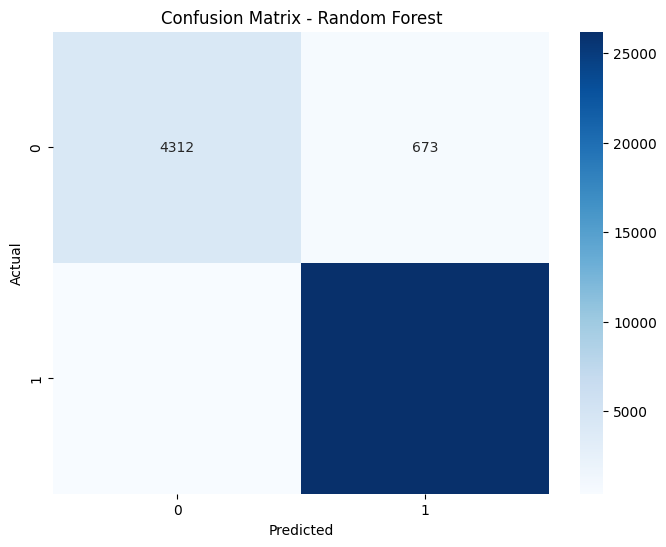

In [36]:
# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance Plot

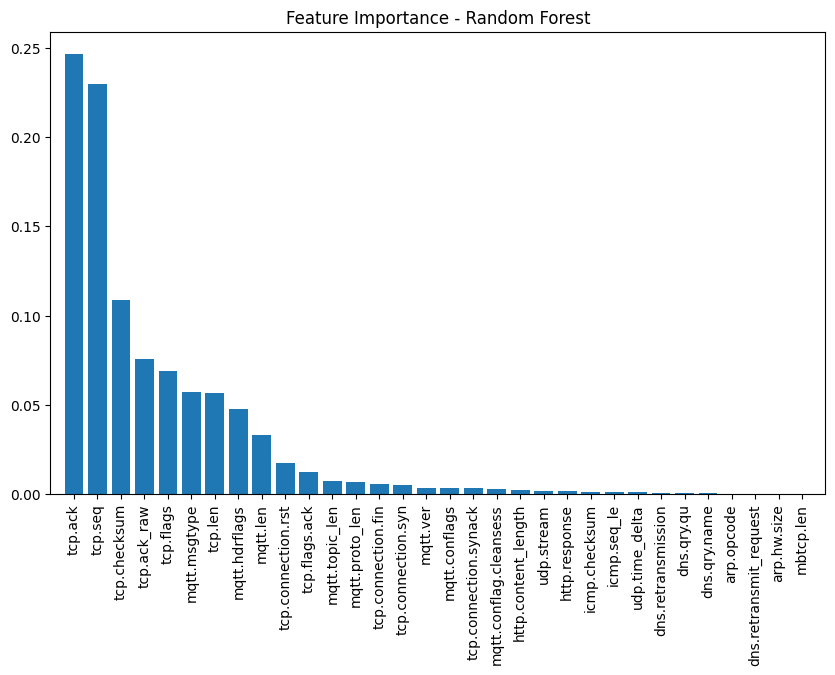

In [37]:
# Plotting feature importance
plt.figure(figsize=(10, 6))
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.title("Feature Importance - Random Forest")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Model Comparison Plot

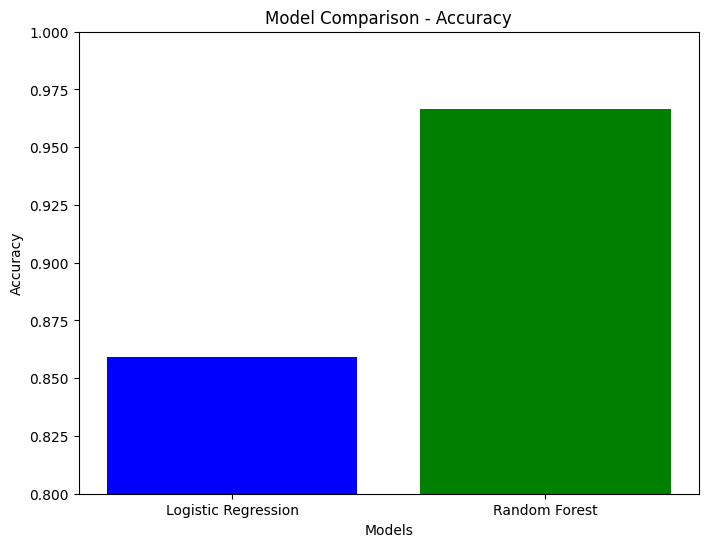

In [39]:
import matplotlib.pyplot as plt

# List of model names
models = ['Logistic Regression', 'Random Forest']

# List of accuracies
accuracies = [accuracy_lr, accuracy_rf]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()

# CNN Model Implementation

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout

In [41]:
# Reshape X to a 3D array suitable for CNN
X = np.array(X).reshape(X.shape[0], X.shape[1], 1)

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Reshape X_train and X_test to 2D arrays for scaling
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

In [45]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)

In [46]:
# Building the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [47]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


3156/3156 [==============================] - 13s 4ms/step - loss: 136777.4531 - accuracy: 0.8465 - val_loss: 0.4852 - val_accuracy: 0.8472
Epoch 2/10
3156/3156 [==============================] - 11s 3ms/step - loss: 3.1512 - accuracy: 0.8468 - val_loss: 0.4944 - val_accuracy: 0.8472
Epoch 3/10
3156/3156 [==============================] - 11s 4ms/step - loss: 805.3931 - accuracy: 0.8466 - val_loss: 0.5034 - val_accuracy: 0.8472
Epoch 4/10
3156/3156 [==============================] - 11s 4ms/step - loss: 12.3517 - accuracy: 0.8468 - val_loss: 0.4793 - val_accuracy: 0.8472
Epoch 5/10
3156/3156 [==============================] - 10s 3ms/step - loss: 173.6605 - accuracy: 0.8468 - val_loss: 0.4267 - val_accuracy: 0.8472
Epoch 6/10
3156/3156 [==============================] - 12s 4ms/step - loss: 0.7538 - accuracy: 0.8469 - val_loss: 0.3974 - val_accuracy: 0.8472
Epoch 7/10
3156/3156 [==============================] - 11s 4ms/step - loss: 3.6899 - accuracy: 0.8469 - val_loss: 0.4

In [49]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

987/987 [==============================] - 2s 2ms/step - loss: 1.0102 - accuracy: 0.8420
Test Loss: 1.0101573467254639
Test Accuracy: 0.8420469164848328
